In [59]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

The firing rate equation. Note the discontinuity at 0.4. Doesn't seem to affect simulations further on...

In [60]:
a = 270
b = 108
d = 0.154

def F(I):
    v = a*I - b
    return v / (1.0 - np.exp(-d*v))

/Applications/Anaconda/anaconda/envs/mlbook/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


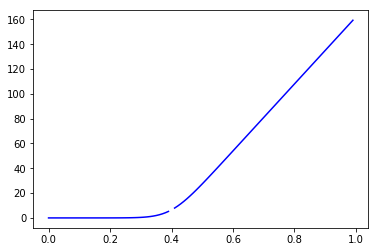

In [61]:
X = np.arange(0.0, 1.0, .01)
plt.plot(X, F(X), "b-")
plt.show()

The synaptic drive equations:

In [62]:
gamma = 0.641
phi = 1.0
timeconstant = 100

def dsdt(I, s):
    f = F(I) / 1000.0
    return phi*(f*gamma*(1.0-s) - s/timeconstant)

Input has noise given by 'Ornstein-Uhlenbeck process', and have a graph of it too:

In [63]:
I0 = 0.3255
rho0 = 2
noise_amplitude = 0.02

def dIbdt(Ib):
    v = -(Ib - I0) / rho0 + np.random.normal() * np.sqrt(rho0 * noise_amplitude**2.0)
    return v / rho0

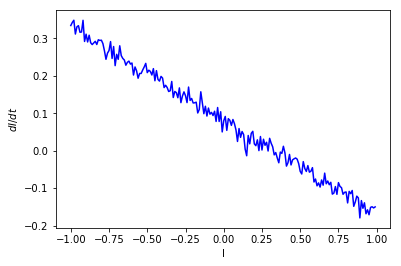

In [64]:
X = np.arange(-1, 1, .01)
y = [dIbdt(x) for x in X]
plt.plot(X, y, "b-")
plt.xlabel('I')
plt.ylabel(r'$dI/dt$')
plt.show()

The code to run a simulation over 3000 millisecs:

In [65]:
gE = 0.2609
gI = 0.0497
gext = 0.00052

def simulateit():
    np.random.seed()
    vals = []

    s1 = 0.1
    s2 = 0.1
    Ib1 = 0
    Ib2 = 0
    
    for t in range(0, 3000):
        mu1 = 30 if 500 < t < 1500 else 0 #t >= 500 and t < 1500 else 0
        mu2 = mu1
        Ib1 = Ib1 + dIbdt(Ib1)
        Ib2 = Ib2 + dIbdt(Ib2)
        i1 = gE*s1 - gI*s2 + Ib1 + gext*mu1
        i2 = gE*s2 - gI*s1 + Ib2 + gext*mu2
        r1 = F(i1)
        r2 = F(i2)
        s1 = s1 + dsdt(i1, s1)
        s2 = s2 + dsdt(i2, s2)
        vals.append([t, r1, r2, s1, s2, mu1, mu2, i1, i2])
        
    return np.array(vals).transpose()

Run a simulation, plot mu (the input), i1 and i2, r1 and r2, s1 and s2, and the two phase diagrams.

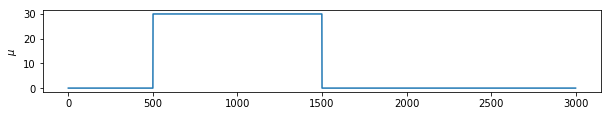

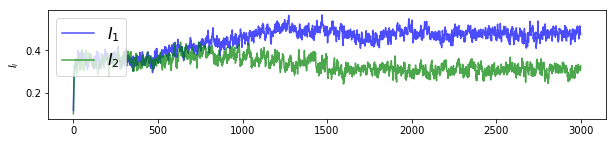

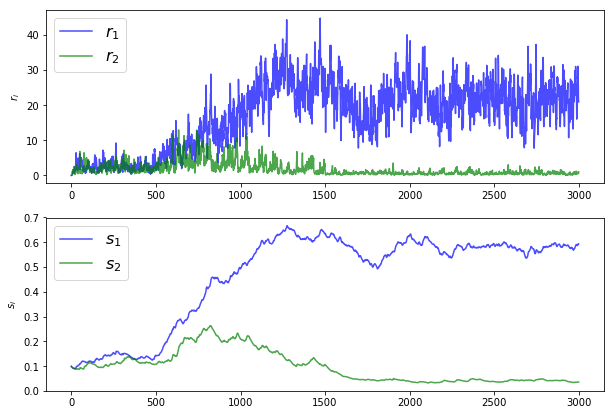

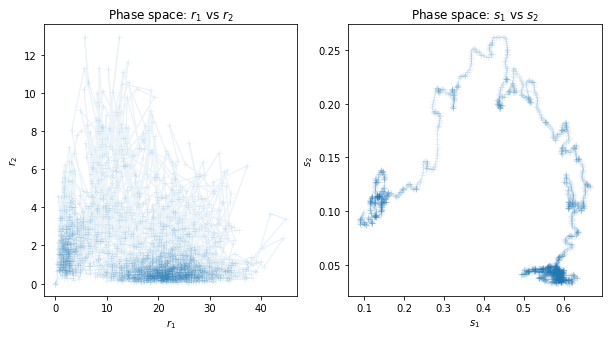

In [66]:
k = simulateit()

timesteps = k[0]
r1 = k[1] 
r2 = k[2] 
s1 = k[3] 
s2 = k[4] 
mu1 = k[5]
mu2 = k[6]
i1 = k[7] 
i2 = k[8] 

plt.figure(figsize=(10,1.5))
plt.plot(timesteps, mu1, "-")
plt.ylabel(r'$\mu$')

plt.figure(figsize=(10,2))
plt.plot(timesteps, i1, "b-", label=r'$I_1$', alpha=0.7)
plt.plot(timesteps, i2, "g-", label=r'$I_2$', alpha=0.7)
plt.ylabel(r'$I_i$')
plt.legend(loc="upper left", fontsize=16)

plt.figure(figsize=(10,7))

plt.subplot(211)
plt.plot(timesteps, r1, "b-", label=r'$r_1$', alpha=0.7)
plt.plot(timesteps, r2, "g-", label=r'$r_2$', alpha=0.7)
plt.ylabel(r'$r_i$')
plt.legend(loc="upper left", fontsize=16)

plt.subplot(212)
plt.plot(timesteps, s1, "b-", label=r'$s_1$', alpha=0.7)
plt.plot(timesteps, s2, "g-", label=r'$s_2$', alpha=0.7)
plt.ylabel(r'$s_i$')
plt.legend(loc="upper left", fontsize=16)


plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(r1, r2, '-+', alpha=0.08)
plt.xlabel(r'$r_1$')
plt.ylabel(r'$r_2$')
plt.title(r'Phase space: $r_1$ vs $r_2$')

plt.subplot(122)
plt.plot(s1, s2, '-+', alpha=0.08)
plt.xlabel(r'$s_1$')
plt.ylabel(r'$s_2$')
plt.title(r'Phase space: $s_1$ vs $s_2$')
           
plt.show()

Now do a bunch of simulations - we can see that it's about 50/50 whether each neural assembly wins

In [67]:
r1wins = 0
r2wins = 0
for i in range(0, 500):
    k = simulateit()
    if k[1][2000] > k[2][2000]:
        r1wins += 1
    else:
        r2wins += 1
print ('R1 wins: ', r1wins, '(', r1wins/500, ')   R2 wins: ', r2wins, '(', r2wins/500, ')')

R1 wins:  243 ( 0.486 )   R2 wins:  257 ( 0.514 )
